In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


**데이터 분석**

In [123]:
import numpy as np
import pandas as pd

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [124]:
train.shape, test.shape

# Q. CJW: 엥..왜 열 수가 이렇게 다르지?
# A. casual, registered, count가 train에 있는데..count를 예측할거다. --> casual, registered는 뺴야한다는군 (p.184)

((10886, 12), (6493, 9))

In [125]:
display(train.columns)
display(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [128]:
'''
Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
'''

'\nData Fields\ndatetime - hourly date + timestamp  \nseason -  1 = spring, 2 = summer, 3 = fall, 4 = winter \nholiday - whether the day is considered a holiday\nworkingday - whether the day is neither a weekend nor holiday\nweather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\nhumidity - relative humidity\nwindspeed - wind speed\ncasual - number of non-registered user rentals initiated\nregistered - number of registered user rentals initiated\ncount - number of total rentals\n'

In [129]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [130]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [131]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [132]:
# Q. CJW: p.185에서 datatime은 예측에 역할을 못하니까 뺀다고 하는데 진짜 필요없는지 확인해보자.
# 시간대별로 뭔가 써먹을 수 있는게 있지 않을까?
# A...아..연,월,일로 분리하기 때문에 필요없다는 의미구나..옥히

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [135]:
print(train['datetime'][1000])
print(train['datetime'][1000].split())
print(train['datetime'][1000].split()[0])
print(train['datetime'][1000].split()[1])

2011-03-06 03:00:00
['2011-03-06', '03:00:00']
2011-03-06
03:00:00


In [136]:
print(train['datetime'][1000].split('-'))
print(train['datetime'][1000].split()[0].split('-'))
print(train['datetime'][1000].split()[0].split('-')[0])
print(train['datetime'][1000].split()[0].split('-')[1])
print(train['datetime'][1000].split()[0].split('-')[2])
print(train['datetime'][1000].split()[0].split('-')[-1])

['2011', '03', '06 03:00:00']
['2011', '03', '06']
2011
03
06
06


In [137]:
print(train['datetime'][1000].split(':'))
print(train['datetime'][1000].split()[1].split(':'))
print(train['datetime'][1000].split()[1].split(':')[0])
print(train['datetime'][1000].split()[1].split(':')[1])
print(train['datetime'][1000].split()[1].split(':')[2])

['2011-03-06 03', '00', '00']
['03', '00', '00']
03
00
00


In [138]:
type(train['datetime'][1000])

str

In [139]:
print(train['datetime'][1000])
print(train['datetime'][1000].replace(':', '-').replace(' ', '-').split('-'))
#Q. CJW: 쓸데 없는 짓인듯 하다. 코드 가독이 더 떨어지는 듯한 느낌이군.

2011-03-06 03:00:00
['2011', '03', '06', '03', '00', '00']


In [140]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

In [141]:
train.date

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 10886, dtype: object

In [142]:
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [143]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012-12-19,2012,12,19,23,00,00


In [144]:
from datetime import datetime
import calendar

print(train['date'][1000])
print(datetime.strptime(train['date'][1000], '%Y-%m-%d'))

2011-03-06
2011-03-06 00:00:00


In [145]:
print(datetime.strptime(train['date'][1000], '%Y-%m-%d').weekday())

6


In [146]:
print(calendar.day_name[datetime.strptime(train['date'][1000], '%Y-%m-%d').weekday()])

Sunday


In [147]:
train['weekday'] = train['date'].apply(
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [148]:
train['weekday']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday, Length: 10886, dtype: object

In [149]:
train['season'] = train['season'].map(
    {
        1: 'Spring',
        2: 'Summer',
        3: 'Fall',
        4: 'Winter'
    })
train['weather'] = train['weather'].map(
    {
        1: 'Clear',
        2: 'Mist, Few clouds',
        3: 'Light Snow, Rain, Thunderstorm',
        4: 'Heavy Rain, Thunderstorm, Snow, Fog'
    })

In [150]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  year        10886 non-null  object 
 14  month       10886 non-null  object 
 15  day         10886 non-null  object 
 16  hour        10886 non-null  object 
 17  minute      10886 non-null  object 
 18  second      10886 non-null  object 
 19  weekday     10886 non-nul

**시각화**

In [152]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

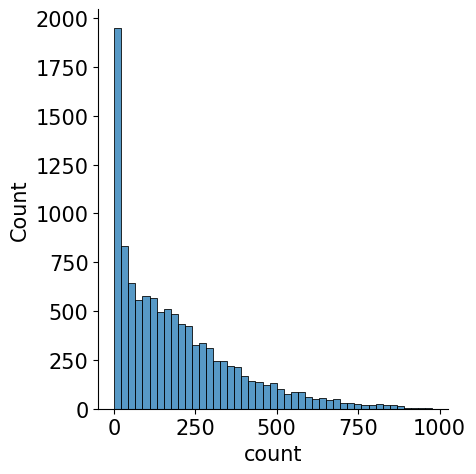

In [153]:
mpl.rc('font', size=15)
sns.displot(train['count'])

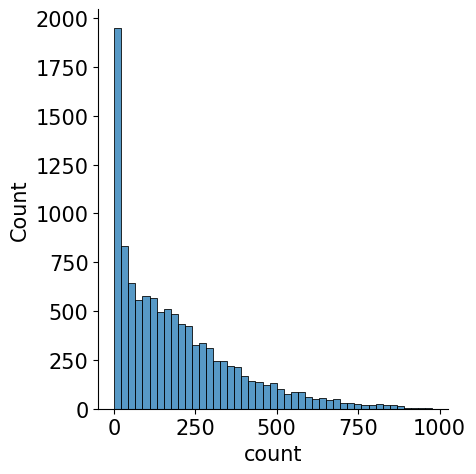

In [154]:
sns.displot(data = train, x = 'count')
# 분포가 왼쪽으로 쏠려있다.. -> 정규 분포를 따르게 만들면 성능이 좋다는데 (p.193)
# 이러한 방법이 log변환이다.

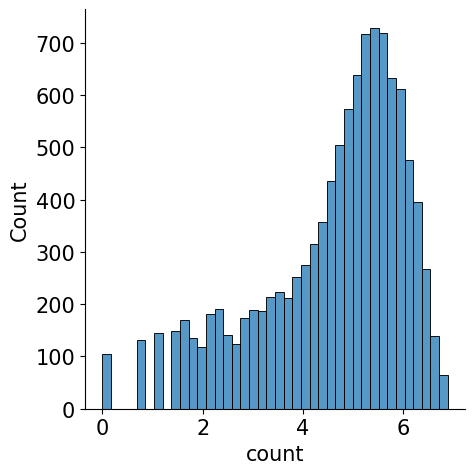

In [155]:
sns.displot(data = np.log(train['count']))

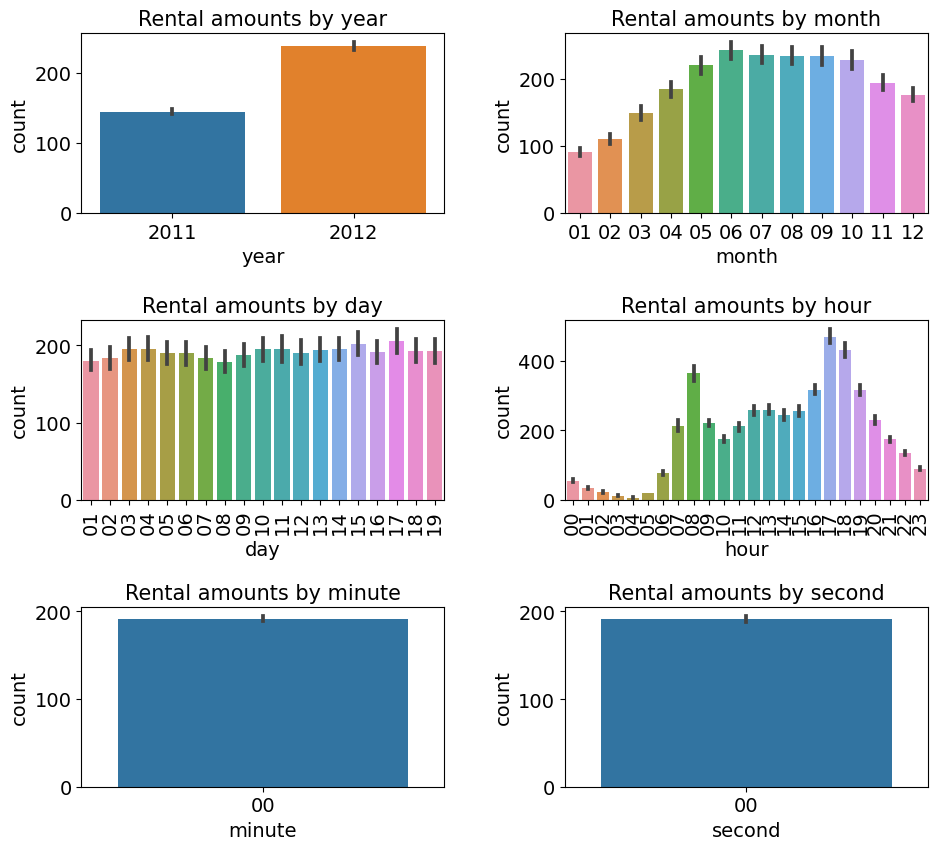

In [156]:
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10, 9)

sns.barplot(data = train, x = 'year', y = 'count', ax = axes[0, 0])
sns.barplot(data = train, x = 'month', y = 'count', ax = axes[0, 1])
sns.barplot(data = train, x = 'day', y = 'count', ax = axes[1, 0])
sns.barplot(data = train, x = 'hour', y = 'count', ax = axes[1, 1])
sns.barplot(data = train, x = 'minute', y = 'count', ax = axes[2, 0])
sns.barplot(data = train, x = 'second', y = 'count', ax = axes[2, 1])

axes[0, 0].set(title = 'Rental amounts by year')
axes[0, 1].set(title = 'Rental amounts by month')
axes[1, 0].set(title = 'Rental amounts by day')
axes[1, 1].set(title = 'Rental amounts by hour')
axes[2, 0].set(title = 'Rental amounts by minute')
axes[2, 1].set(title = 'Rental amounts by second')

axes[1, 0].tick_params(axis = 'x', labelrotation = 90)
axes[1, 1].tick_params(axis = 'x', labelrotation = 90)

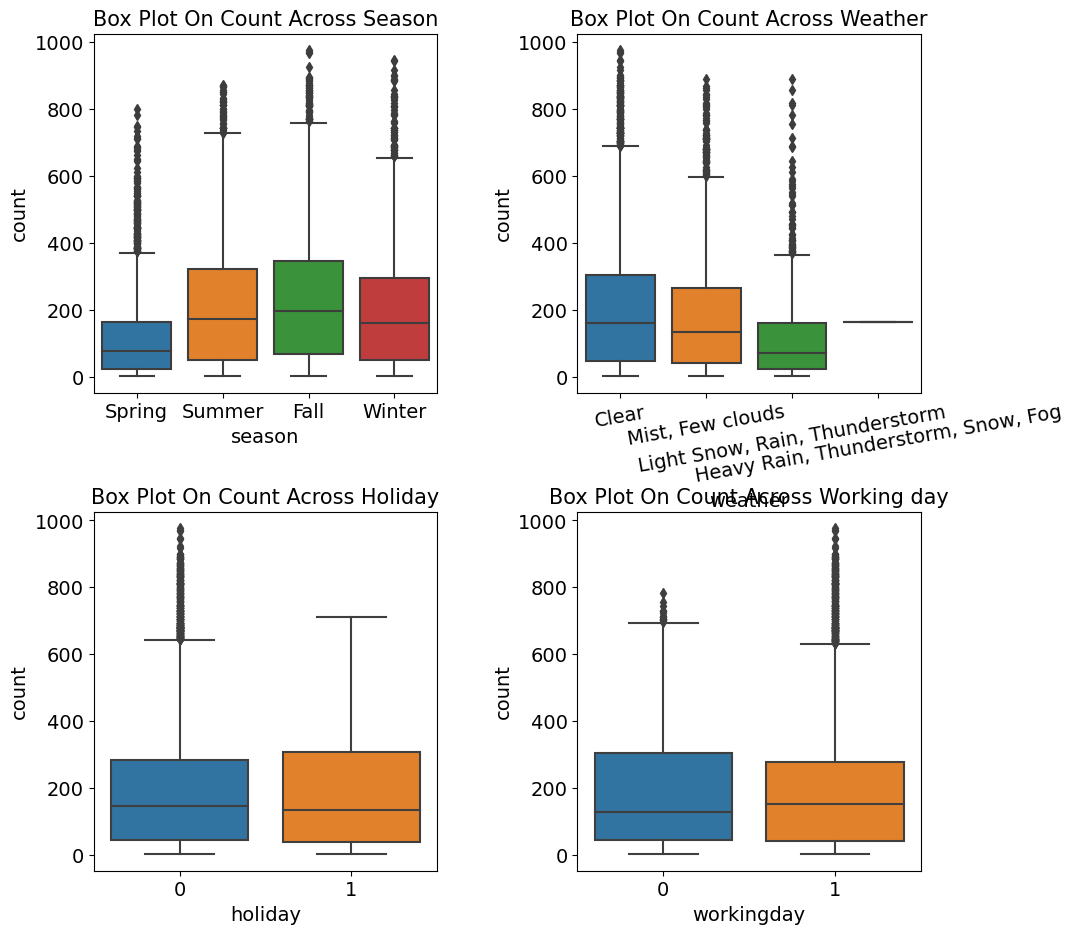

In [157]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(x = 'season', y = 'count', data = train, ax = axes[0, 0])
sns.boxplot(x = 'weather', y = 'count', data = train, ax = axes[0, 1])
sns.boxplot(x = 'holiday', y = 'count', data = train, ax = axes[1, 0])
sns.boxplot(x = 'workingday', y = 'count', data = train, ax = axes[1, 1])

axes[0, 0].set(title = "Box Plot On Count Across Season")
axes[0, 1].set(title = "Box Plot On Count Across Weather")
axes[1, 0].set(title = "Box Plot On Count Across Holiday")
axes[1, 1].set(title = "Box Plot On Count Across Working day")

axes[0, 1].tick_params(axis = 'x', labelrotation = 10)

#Q CJW: 이상치가 왜이리 많아???? 

<AxesSubplot:xlabel='hour', ylabel='count'>

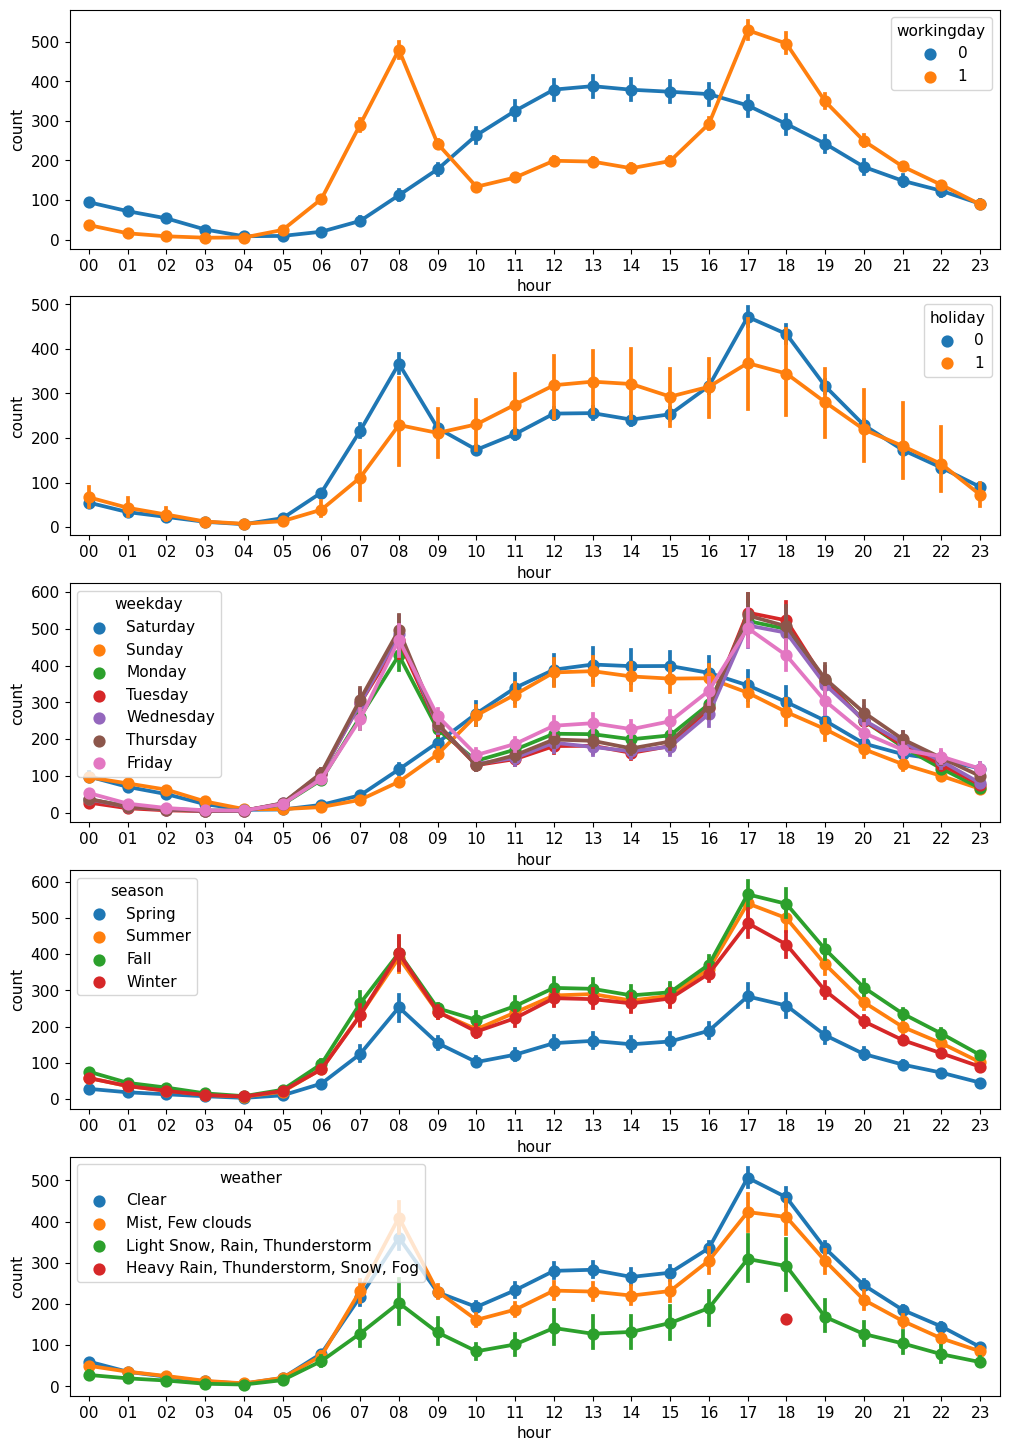

In [158]:
mpl.rc('font', size = 11)
figure, axes = plt.subplots(nrows = 5)
figure.set_size_inches(12, 18)

sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'holiday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weekday', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[3])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[4])


<AxesSubplot:xlabel='humidity', ylabel='count'>

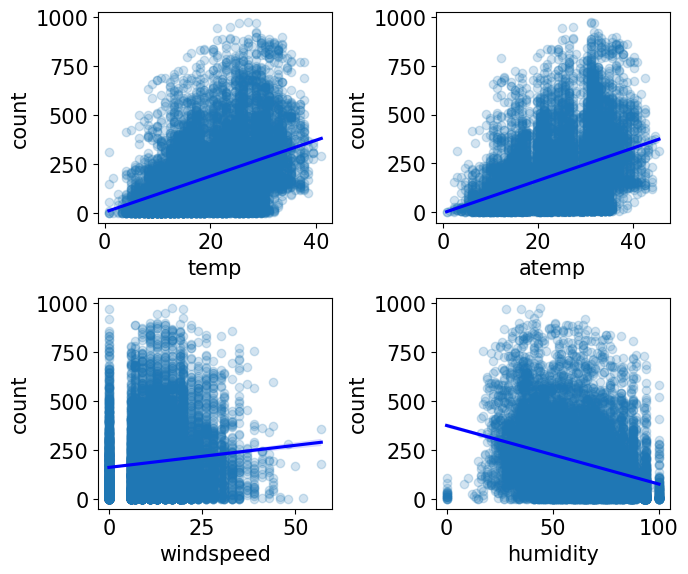

In [159]:
mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(x = 'temp', y = 'count', data = train, ax = axes[0, 0],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'atemp', y = 'count', data = train, ax = axes[0, 1],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'windspeed', y = 'count', data = train, ax = axes[1, 0],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'humidity', y = 'count', data = train, ax = axes[1, 1],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

In [160]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numercal Data')]

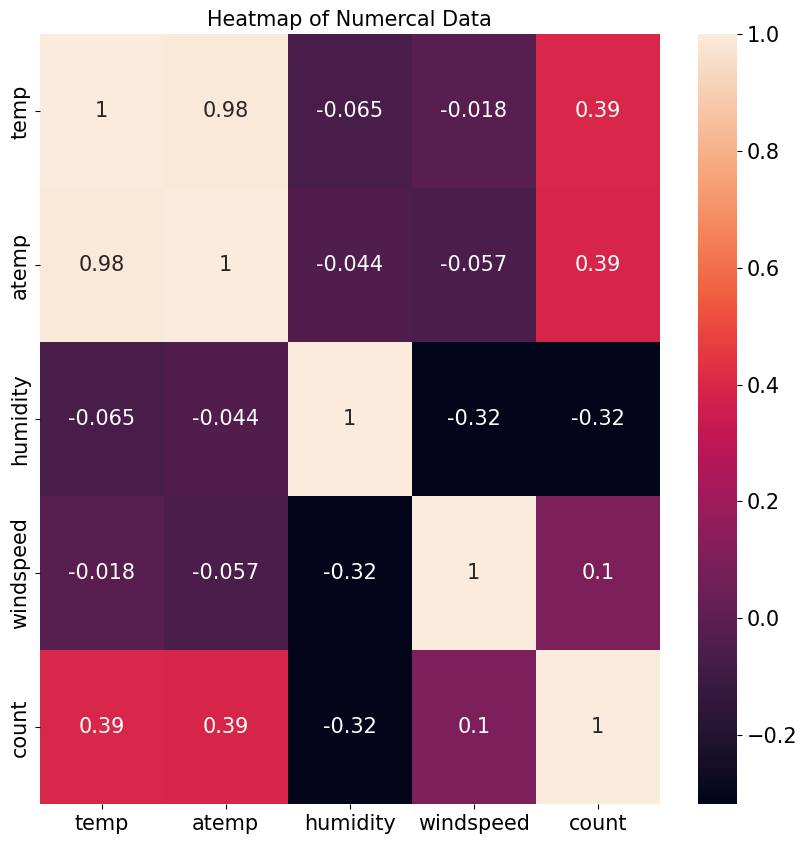

In [161]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot = True)
ax.set(title = 'Heatmap of Numercal Data')

# 상관관계가 약한 피처는 제거한다. (p.208)

**모델**

In [162]:
data_path

'/kaggle/input/bike-sharing-demand/'

In [163]:
#..ㅠㅠㅠ

import pandas as pd

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [164]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [165]:
train = train[train['weather'] != 4]

In [166]:
#데이터 피쳐 조작 전에 train, test 합쳐서 한다.. 한꺼번에 처리하려고..
#test data에 없는 컬럼의 값은 NaN가 되는구나..
all_data = pd.concat([train, test], ignore_index = True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [167]:
from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
#day는 의미 없다고 했다. train이랑 test가 날짜로 분리되서..분,초는 아까 다 0이었자나
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
all_data['weekday'] = all_data['date'].apply(lambda dateString: datetime.strptime(dateString, '%Y-%m-%d').weekday())

In [168]:
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,01,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,01,02,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,01,03,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,01,04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,19,0
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,20,0
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,21,0
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,22,0


In [169]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']

In [170]:
all_data = all_data.drop(drop_features, axis = 1)

In [171]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,00,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,01,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,02,5
3,1,0,0,1,9.84,14.395,75,13.0,2011,03,5
4,1,0,0,1,9.84,14.395,75,1.0,2011,04,5
...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19,0
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20,0
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21,0
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22,0


In [172]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

X_train = X_train.drop(['count'], axis = 1)
X_test = X_test.drop(['count'], axis = 1)

y = train['count']

In [173]:
X_train.head()
#CJW..엥 season이랑 weather가 왜 아직 문자열이지???? -> 책에서는 train, test를 다시 읽었다.ㅠㅠ

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


**평가**

In [174]:
import numpy as np

def rmsle(y_true, y_pred, convertExp = True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))
    
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output

In [175]:
#basemodel
'''
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
'''

'\nfrom sklearn.linear_model import LinearRegression\n\nlinear_reg_model = LinearRegression()\n'

In [176]:
#basemodel
'''
log_y = np.log(y)
linear_reg_model.fit(X_train, log_y)
'''

'\nlog_y = np.log(y)\nlinear_reg_model.fit(X_train, log_y)\n'

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

randomforest_model = RandomForestRegressor()
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator = randomforest_model,
                                             param_grid = rf_params,
                                             scoring=rmsle_scorer,
                                             cv=5)

log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print("최적 하이퍼파라미터:", gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터: {'n_estimators': 140, 'random_state': 42}


In [178]:
#preds = linear_reg_model.predict(X_train)

In [179]:
#print(f'linear regression RMSLE : {rmsle(log_y, preds, True):.4f}')

In [180]:
#log에서 다시 복구하는걸 까먹지 말아야한다!!

'''
linearreg_preds = linear_reg_model.predict(X_test)

submission['count'] = np.exp(linearreg_preds)
submission.to_csv('submission.csv', index=False)
'''

"\nlinearreg_preds = linear_reg_model.predict(X_test)\n\nsubmission['count'] = np.exp(linearreg_preds)\nsubmission.to_csv('submission.csv', index=False)\n"

In [181]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print(f'랜덤 포레스트:{rmsle(log_y, preds, True):.4f}')

랜덤 포레스트:0.1127


Text(0.5, 1.0, 'Predicted Test Data Distribution')

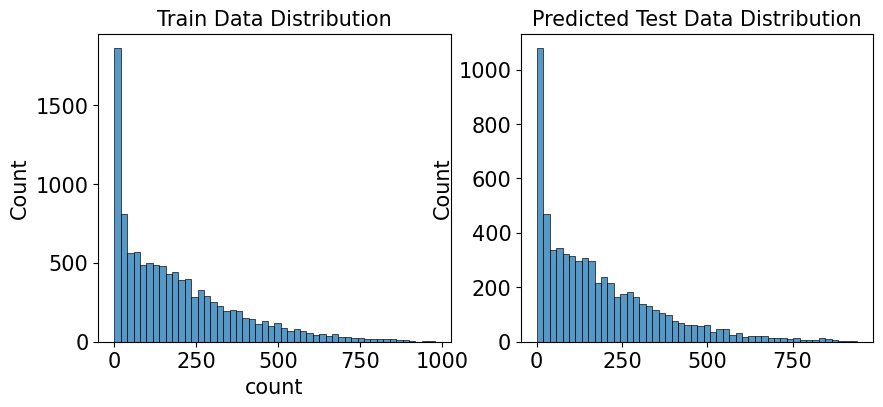

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols = 2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins = 50, ax = axes[0])
axes[0].set_title("Train Data Distribution")
sns.histplot(np.exp(randomforest_preds), bins = 50, ax = axes[1])
axes[1].set_title("Predicted Test Data Distribution")

In [183]:
#log에서 다시 복구하는걸 까먹지 말아야한다!!
submission['count'] = np.exp(randomforest_preds)
submission.to_csv('submission.csv', index = False)